<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Imports</h1>

In [8]:
import random
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from hmmlearn import hmm
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout

<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Constants and Global Variables</h1>

In [9]:
EMOTIONS = ['surprise', 'happiness', 'neutral', 'sadness', 'anger', 'fear', ]
MAPPER = {emotion: [] for emotion in EMOTIONS}
DATA = {emotion: [] for emotion in EMOTIONS}

In [10]:
wordMap = pd.read_csv('wordMap.csv')
for emotion in wordMap.columns.to_list():    
    if emotion.lower() in EMOTIONS: MAPPER[emotion.lower()] = wordMap[emotion].to_list()
    if emotion in ['Calm', 'Boredom']: MAPPER['neutral'] += wordMap[emotion].to_list()
    if emotion in ['Excitement', 'Pride']: MAPPER['happiness'] += wordMap[emotion].to_list()
    if emotion in ['Disgust', 'Frustration', 'Contempt']: MAPPER['anger'] += wordMap[emotion].to_list()

<h1 style="text-align:center; font-family:Georgia; font-weight:bold; ">Cleaning and Preprocessing</h1>

In [11]:
many = pd.read_csv('Raw Datasets/emotion_sentimen_dataset.csv')
for emotion, group in many.groupby('Emotion'):
    if emotion.lower() in EMOTIONS: 
        if emotion.lower() == 'neutral': 
            if len(DATA['neutral']) > 30000: 
                continue
                
        DATA[emotion.lower()].extend(group['text'].tolist())

In [12]:
encoded = pd.read_csv('Raw Datasets/text.csv')
for emotion, group in encoded.groupby('label'):
    if emotion == 0: DATA['sadness'].extend(group['text'].tolist()) 
    if emotion == 1: DATA['happiness'].extend(group['text'].tolist())
    if emotion == 3: DATA['anger'].extend(group['text'].tolist())
    if emotion == 4: DATA['fear'].extend(group['text'].tolist())
    if emotion == 5: DATA['surprise'].extend(group['text'].tolist())

In [13]:
df = pd.DataFrame([
    {'Text': text, 'Emotion': emotion}
    for emotion, texts in DATA.items()
    for text in texts
])
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()
df.to_csv('Collected Datasets/text.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710943 entries, 0 to 710942
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Text     710943 non-null  object
 1   Emotion  710943 non-null  object
dtypes: object(2)
memory usage: 10.8+ MB


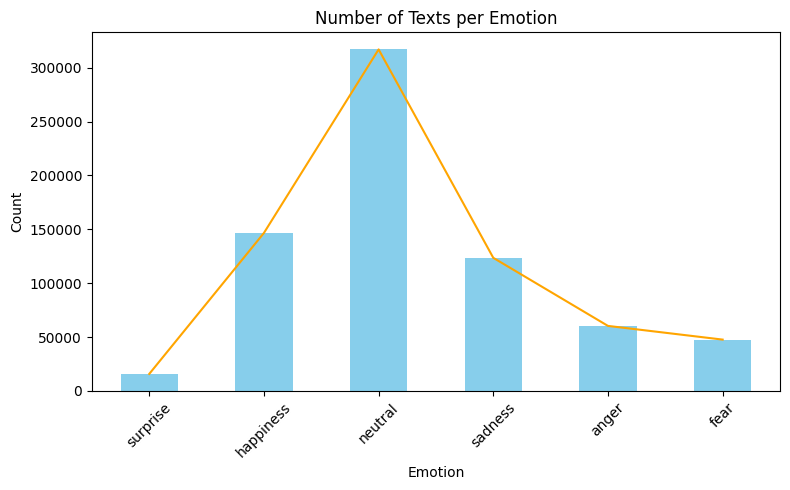

In [14]:
def plotEmotionCounts(df):
    emotionCounts = df.groupby('Emotion').size().reindex(df['Emotion'].unique())
    
    plt.figure(figsize=(8, 5))
    emotionCounts.plot(kind='bar', color='skyblue')
    
    plt.plot(range(len(emotionCounts)), emotionCounts.values, color='orange', label='Trend')

    
    plt.title('Number of Texts per Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotEmotionCounts(df)
